##**Netflix Stock Price Prediction**

Netflix, Inc. is an American media company based in Los Gatos, California. Founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California

This dataset contains the stock price values of Netflix from 2018 to 2022.

Feature Description:
1. Date - Date of open market
2. Open - Price when market opens
3. High - Highest price during open period
4. Low - Lowest price during open period
5. Close - Price when market is closed
6. Adj Close - Closing price after adjustments 
7. Volume - number of shares traded

![](https://drive.google.com/uc?export=view&id=14PdGhWKC3tj7KDvX42Ihgz3DCIVO14hd)

##Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

In [2]:
df = pd.read_csv('/kaggle/input/netflix-stock-price-prediction/NFLX.csv')
df1 = df.copy()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
df.shape

(1009, 7)

In [4]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.nunique()

Date         1009
Open          976
High          983
Low           989
Close         988
Adj Close     988
Volume       1005
dtype: int64

##EDA

In [8]:
plt.style.use('fivethirtyeight')

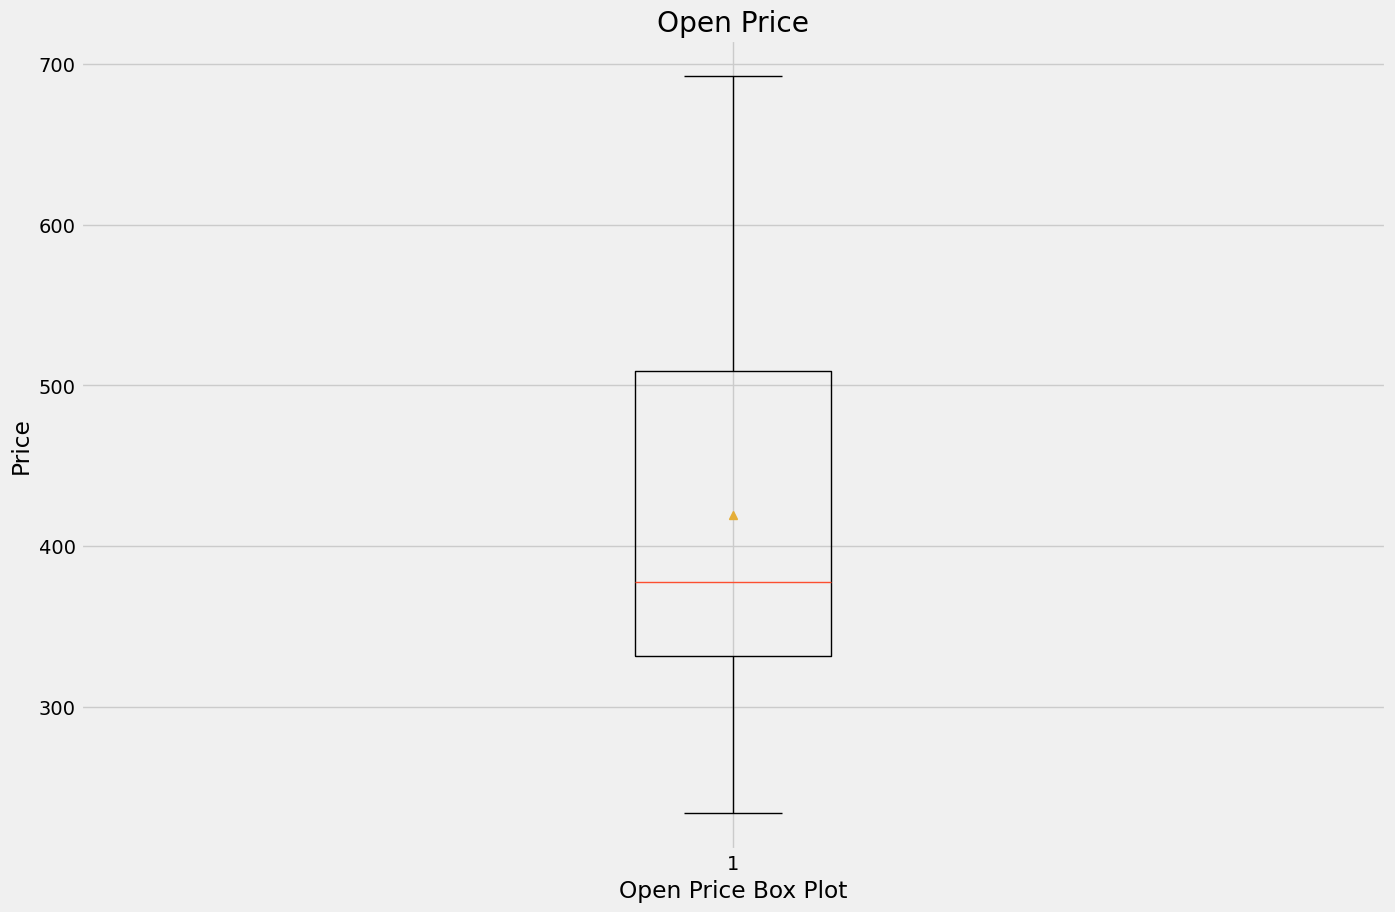

In [9]:
plt.subplots(figsize=(15, 10))
plt.title("Open Price")
plt.boxplot(df['Open'], showmeans=True)
plt.xlabel("Open Price Box Plot")
plt.ylabel("Price")
plt.show()

In [10]:
print("Mean price is :", statistics.mean(df['Open']))
print("Median price is :", statistics.median(df['Open']))

Mean price is : 419.05967286223984
Median price is : 377.769989


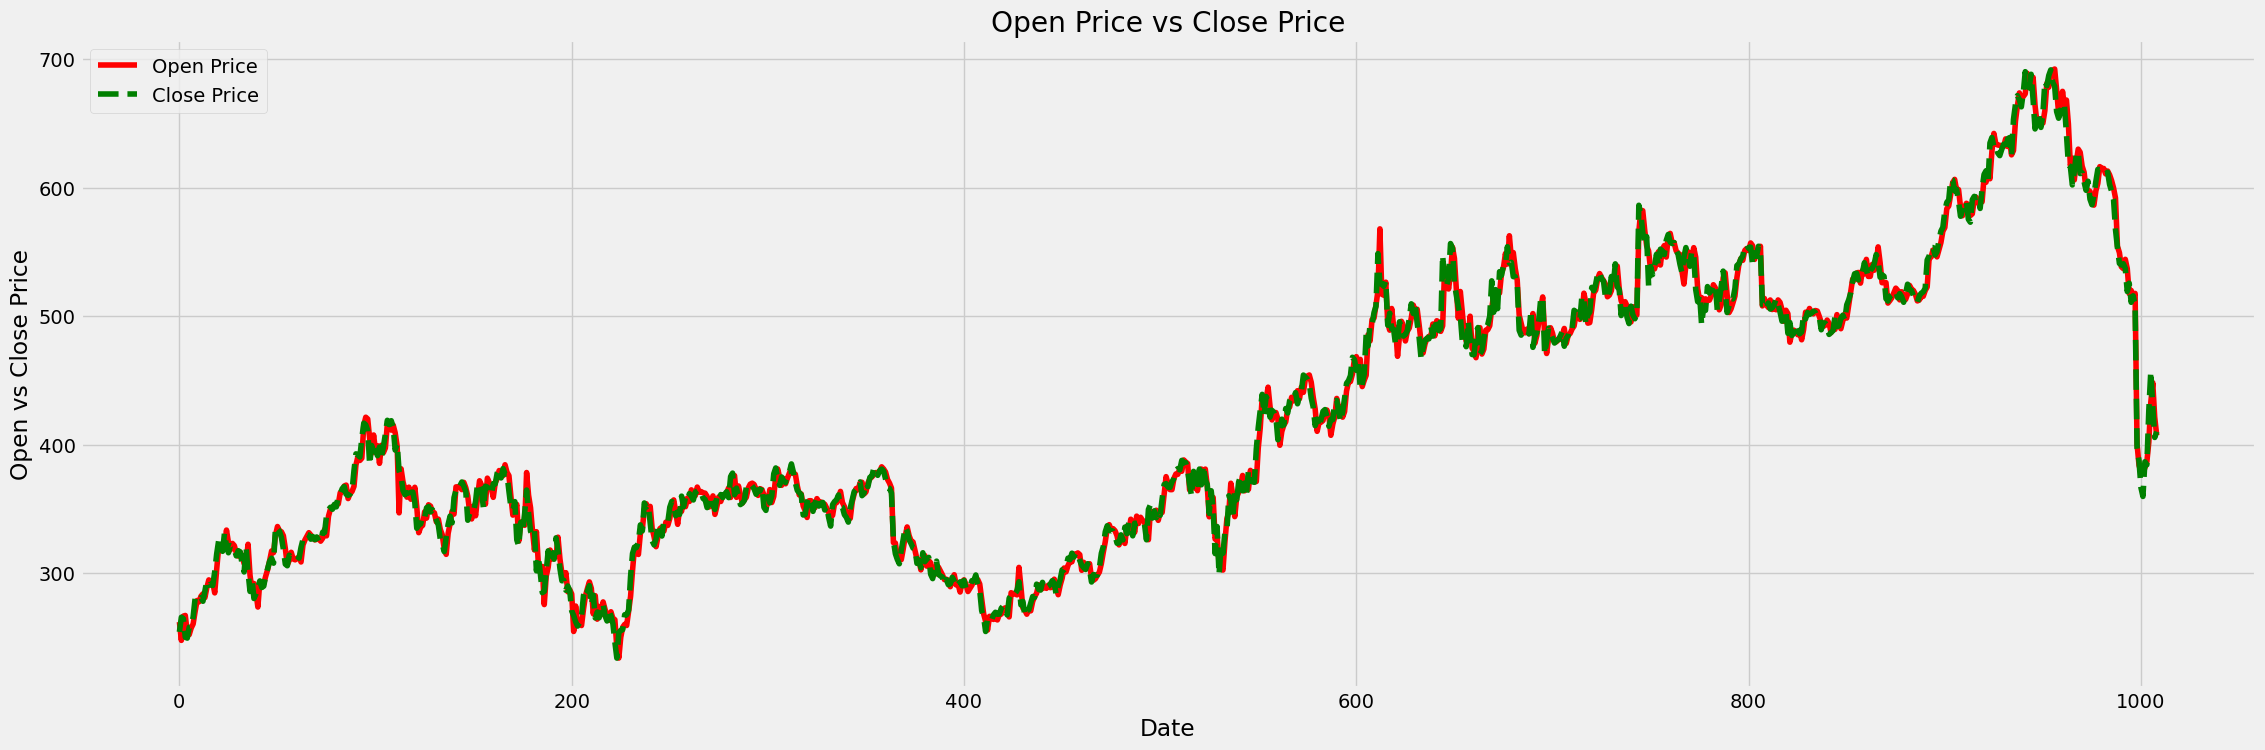

In [11]:
plt.subplots(figsize=(25, 8))
plt.title("Open Price vs Close Price")
plt.plot(df['Open'], color='red', linestyle='solid',  label = 'Open Price')
plt.plot(df['Close'], color='green', linestyle='dashed',  label = 'Close Price')
plt.xlabel("Date")
plt.ylabel("Open vs Close Price")
plt.legend(loc="upper left")
plt.show()

We see a price drop in January of 2022 after the 4th quarter

**Possible Causes**
- Price raise 13.99 to 15.49 per month. 
- Streaming competition was rising eating growth in fourth-quarter earnings

**Positive Outlook**
- Being viewed as a value stock compared to a growth stock
-  Price increases should keep revenue growing

**Solutions**
- Aim to convert password sharing users into subscribers
- Add a lower-cost ad-supported tier

##Prepare Data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
# change object to datetime
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

# set date to index
df = df.set_index('Date')

In [14]:
# split data for prediciting january 2022
train = df.loc['2018-02-05':'2021-12-31']
test = df.loc['2022-01-01':'2022-01-31']

In [15]:
# split training data
X_train = train.drop(columns = ['Open'])
y_train = train['Open']
# split testing data
X_test = test.drop(columns = ['Open'])
y_test = test['Open']

##Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
# build model
rf = RandomForestRegressor(max_depth=20, random_state = 42,  n_estimators=150)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=150, random_state=42)

In [18]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9996830741916087
0.9918135946459509


In [19]:
pred = rf.predict(X_test)
train_pred = rf.predict(X_train)

In [20]:
prediction_df = X_test.copy()
prediction_df['Open'] = y_test
prediction_df['Predicted Price'] = pred
prediction_df.head()

,High,Low,Close,Adj Close,Volume,Open,Predicted Price
Date,,,,,,,
2022-01-03,609.989990,590.559998,597.369995,597.369995,3067500,605.609985,597.302736
2022-01-04,600.409973,581.599976,591.150024,591.150024,4393100,599.909973,589.919729
2022-01-05,592.840027,566.880005,567.520020,567.520020,4148700,592.000000,582.541523
2022-01-06,563.359985,542.010010,553.289978,553.289978,5711800,554.340027,550.311327
2022-01-07,553.429993,538.219971,541.059998,541.059998,3381700,549.460022,547.067863


##Results

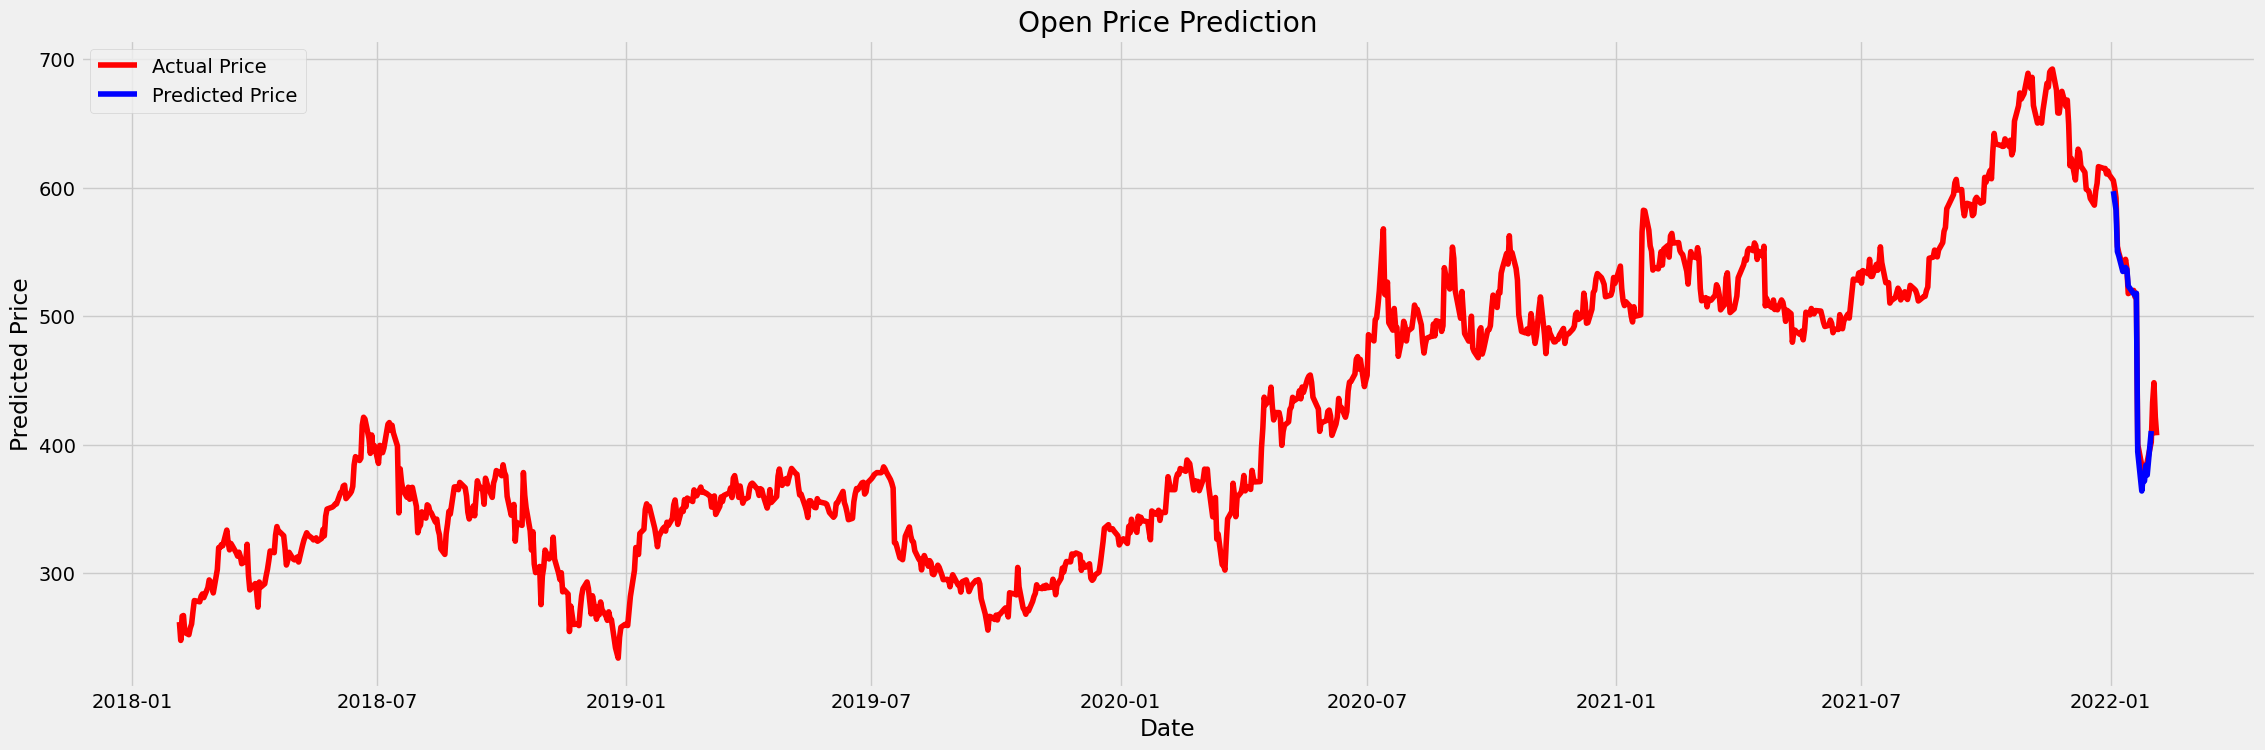

In [21]:
plt.subplots(figsize=(25, 8))
plt.title("Open Price Prediction")
#plt.plot(prediction_df['Open'], color='red', linestyle='solid')
plt.plot(df['Open'], color='red', linestyle='solid', label = 'Actual Price')
plt.plot(prediction_df['Predicted Price'], color='blue', linestyle='solid', label = 'Predicted Price')
plt.xlabel("Date")
plt.ylabel("Predicted Price")
plt.legend(loc="upper left")
plt.show()

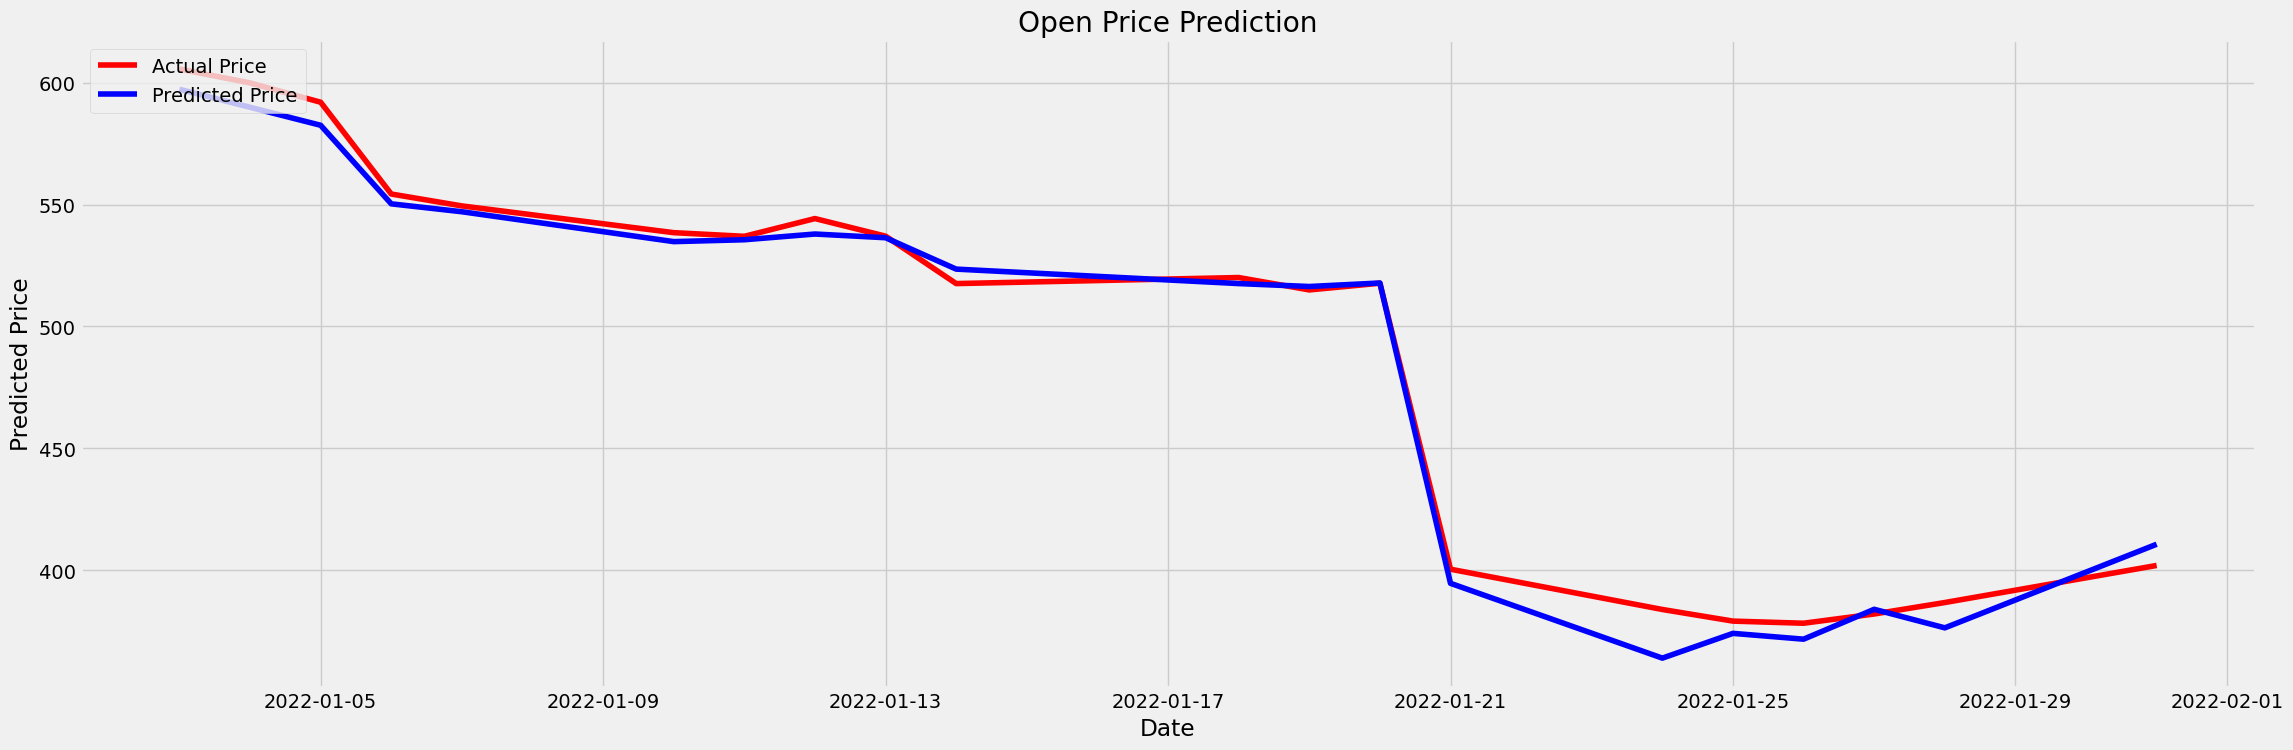

In [22]:
plt.subplots(figsize=(25, 8))
plt.title("Open Price Prediction")
plt.plot(prediction_df['Open'], color='red', linestyle='solid',  label = 'Actual Price')
plt.plot(prediction_df['Predicted Price'], color='blue', linestyle='solid', label = 'Predicted Price')
plt.xlabel("Date")
plt.ylabel("Predicted Price")
plt.legend(loc="upper left")
plt.show()

##Model Evaluation

In [23]:
from sklearn import metrics

In [24]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, pred), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, pred), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, pred)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, pred), 4))
print(f'Train Score : {rf.score(X_train, y_train) * 100:.2f}% and Test Score : {rf.score(X_test, y_test) * 100:.2f}% using Random Tree.')
errors = abs(pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 5.725
Mean Squared Error: 53.3474
Root Mean Squared Error: 7.3039
(R^2) Score: 0.9918
Train Score : 99.97% and Test Score : 99.18% using Random Tree.
Accuracy: 98.75 %.


##**2023 Company Outlook**

**Positives**
- Shares have gained 1.4% this year, outperforming the S&P 500, which is up 0.2%
- Removing password sharing can allow a 2-8 billion growth in revenue.
- Ad tier plan has attracted more than 1 million users after just two months
- Cash flow positive in 2022
- 2 billion in operating cash 
- 1.6 billion in free cash flow


**Precautions**
- The closure of Silicon Valley Bank may affect tech stocks
- Fears around higher churn from enforcing password sharing
- Gave some money to advertisers when number of viewers expected didn't materialize.